In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import keras
import matplotlib.pyplot as plt
import os
import cv2 
import numpy as np
import random
from keras.utils import to_categorical

from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [8]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "/kaggle/input/leapgestrecog/leapGestRecog"

In [9]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [12]:
random.shuffle(image_data)

In [32]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
label[:10]

[4, 2, 2, 5, 7, 6, 7, 3, 9, 1]

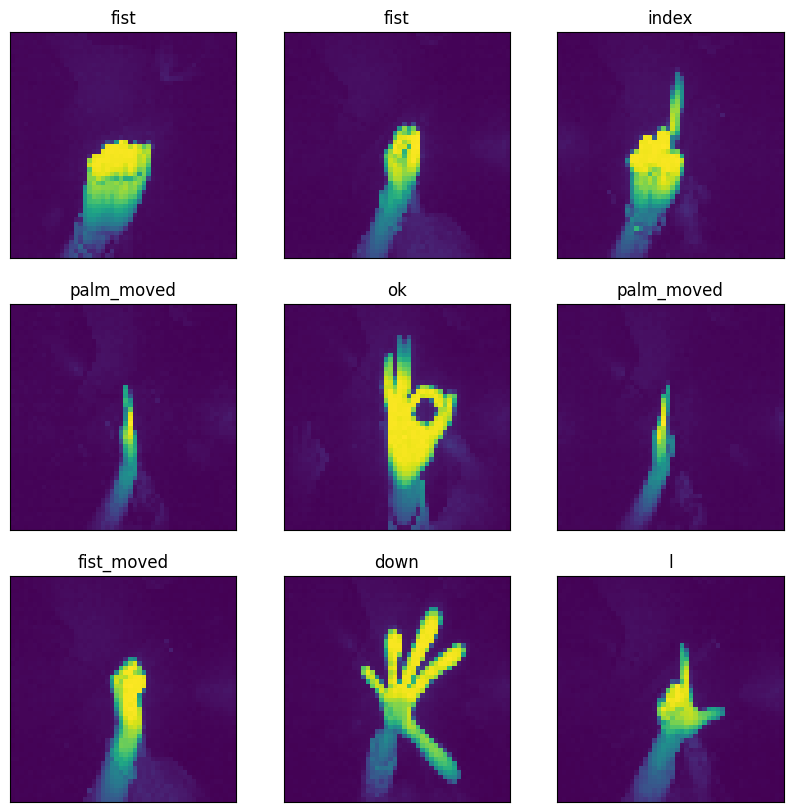

In [16]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0])
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [33]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
print(input_data.shape)

(20000, 50, 50)


In [35]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
print(label[0])
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

[0 0 0 0 1 0 0 0 0 0]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [38]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 64s 144ms/step - loss: 0.3545 - accuracy: 0.8843 - val_loss: 0.0157 - val_accuracy: 0.9967
Epoch 2/7
438/438 [==============================] - 63s 144ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 3/7
438/438 [==============================] - 62s 142ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 9.4081e-04 - val_accuracy: 1.0000
Epoch 4/7
438/438 [==============================] - 63s 144ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 1.8726e-04 - val_accuracy: 1.0000
Epoch 5/7
438/438 [==============================] - 63s 143ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/7
438/438 [==============================] - 63s 144ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 4.3693e-04 - val_accuracy: 0.9997
Epoch 7/7
438/438 [==============================] - 63s 144ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0017 - v

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 6s 32ms/step - loss: 0.0017 - accuracy: 0.9997
Test accuracy: 99.97%
